# Priorización de Hipótesis y Análisis de Test A/B


En colaboración con el __departamento de marketing__, se han recopilado __nueve hipótesis__ para __aumentar los ingresos__.

__Priorización de Hipótesis:__

- Aplicar el __framework ICE__ para priorizar hipótesis y ordenarlas de forma descendente
- Aplicar el __framework RICE__ para priorizar hipótesis y ordenarlas de forma descendente
- Explicar cómo cambia la __priorización__ al usar RICE en lugar de ICE, proporcionando una explicación de los cambios

__Análisis de Test A/B:__

- Representar gráficamente el __ingreso acumulado__ por grupo
- Representar gráficamente el __tamaño de pedido promedio__ acumulado por grupo
- Representar gráficamente la __diferencia relativa en el tamaño de pedido promedio__ entre el grupo B y el grupo A 
- Calcular la __tasa de conversión__ de cada grupo y representar gráficamente las __tasas diarias__
- Realizar un gráfico de dispersión del __número de pedidos por usuario__
- Calcular los __percentiles__ 95 y 99 para el número de pedidos por usuario y definir el __punto de anomalía__
- Realizar un gráfico de dispersión de los __precios de los pedidos__
- Calcular los __percentiles__ 95 y 99 de los precios de los pedidos y definir el __punto de anomalía__

__Utilizando datos en bruto:__
- Determinar la significancia estadística de las __diferencias en la conversión__ entre grupos
- Determinar la significancia estadística de las __diferencias en el tamaño promedio__ de pedido entre grupos 

__Utilizando datos filtrados:__
- Determinar la significancia estadística de las __diferencias en la conversión__ entre grupos
- Determinar la significancia estadística de las __diferencias en el tamaño promedio de pedido__ entre grupos


__Tomar una decisión basada en los resultados de la prueba, entre tres opciones:__ 
- Considerar a uno de los grupos como líder
- Concluir que no hay diferencia entre los grupos
- Continuar la prueba

__Descripción de los datos:__

`/datasets/hypotheses_us.csv`
- `Hypotheses`: breves descripciones de las hipótesis
- `Reach`: alcance del usuario, en una escala del uno al diez
- `Impact`: impacto en los usuarios, en una escala del uno al diez
- `Confidence`: confianza en la hipótesis, en una escala del uno al diez
- `Effort`: los recursos necesarios para probar una hipótesis, en una escala del uno al diez

`/datasets/orders_us.csv`
- `transactionId`: identificador de pedido
- `visitorId`: identificador del usuario que realizó el pedido
- `date`: fecha del pedido
- `revenue`: ingresos del pedido
- `group`: el grupo del test A/B al que pertenece el usuario

`/datasets/visits_us.csv` 
- `date`: la fecha
- `group`: grupo del test A/B
- `visits`: el número de visitas en la fecha especificada por grupo

# Tabla de contenidos

1. [**Importar las librerías y los archivos**](#importar-las-librerias-y-los-archivos)
2. [**Análisis Exploratorio de Datos**](#analisis-exploratorio-de-datos)
   - [hypotheses](#hypotheses)
   - [orders](#orders)
   - [visits](#visits)
3. [**Priorización de Hipótesis**](#priorizacion-de-hipotesis)
   - [ICE Framework](#ice-framework)
   - [RICE Framework](#rice-framework)
   - [Evaluación](#evaluacion)
4. [**Análisis de Test A/B**](#analisis-de-test-ab)
   - [Ingreso acumulado por grupo](#ingreso-acumulado-por-grupo)
   - [Tamaño de pedido promedio por grupo](#tamano-de-pedido-promedio-por-grupo)
   - [Tasa de conversión por grupo](#tasa-de-conversion-por-grupo)
   - [Número de pedidos por usuario](#numero-de-pedidos-por-usuario)
   - [Precios de los pedidos](#precios-de-los-pedidos)
5. [**Utilizando datos brutos**](#utilizando-datos-brutos)
   - [Diferencia en la conversión entre grupos](#diferencia-en-la-conversion-entre-grupos)
   - [Evaluación](#evaluacion-1)
   - [Diferencia en el tamaño de pedido entre grupos](#diferencia-en-el-tamano-de-pedido-entre-grupos)
   - [Evaluación](#evaluacion-2)
6. [**Utilizando datos filtrados**](#utilizando-datos-filtrados)
   - [Diferencia en la conversión entre grupos](#diferencia-en-la-conversion-entre-grupos-1)
   - [Evaluación](#evaluacion-3)
   - [Diferencia en el tamaño promedio de pedido entre grupos](#diferencia-en-el-tamano-promedio-de-pedido-entre-grupos)
   - [Evaluación](#evaluacion-4)
7. [**Evaluación de Estrategias de Optimización para Incrementar Ingresos**](#evaluacion-de-estrategias-de-optimizacion-para-incrementar-ingresos)

<a id="importar-las-librerias-y-los-archivos"></a>

## Importar las librerias y los archivos

In [1]:
# cargar las librerias

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from IPython.display import display

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# cargar los datos

hypotheses_us_original = pd.read_csv("./hypotheses_us.csv", sep=';', engine='python')
orders_us_original = pd.read_csv("./orders_us.csv")
visits_us_original = pd.read_csv("./visits_us.csv")

In [4]:
# crear copias de los DataFrames

hypotheses = hypotheses_us_original.copy()
orders = orders_us_original.copy()
visits = visits_us_original.copy()

<a id="analisis-exploratorio-de-datos"></a>

## Análisis Exploratorio de Datos

<a id="hypotheses"></a>

### `hypotheses` 

In [5]:
# mostrar las descripciones de las hipótesis

pd.set_option('max_colwidth', 120)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


<a id="orders"></a>

### `orders` 

In [6]:
# mostrar las informaciones sobre el DataFrame `orders`

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
# renombrar las columnas del DataFrame `orders`

orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id',})

In [8]:
# imprimir una muestra de datos por el DataFrame `orders`

orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
# resumen estádistico de la columna 'revenue'

print('Resumen estádistico de los ingresos')
orders['revenue'].describe()

Resumen estádistico de los ingresos


count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

In [10]:
# mostrar el número de usuarios en cada grupo

orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [11]:
# crear un filtrado de los usuarios por grupo

group_A_original = orders[(orders['group'] == 'A')]
group_B_original = orders[(orders['group'] == 'B')]

display(group_A_original.head())
display(group_B_original.head())

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [12]:
# obtener la intersección de los usuarios entre el grupo A y el grupo B

users_intersection = set(group_A_original['visitor_id']).intersection(set(group_B_original['visitor_id']))
users_intersection_count = len(users_intersection)

print("Cantidad de usuarios en ambos grupos:", users_intersection_count)

Cantidad de usuarios en ambos grupos: 58


In [13]:
# crear un conjunto sin los `visitor_id` que se encuentran en los dos grupos

users_duplicates = set(users_intersection)
orders_edit = orders[~orders['visitor_id'].isin(users_duplicates)]

display(orders_edit.head())
print(orders_edit.shape)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


(1016, 5)


In [14]:
# crear un filtrado de los usuarios por grupo

group_A = orders_edit[(orders_edit['group'] == 'A')]
group_B = orders_edit[(orders_edit['group'] == 'B')]

display(group_A.head())
display(group_B.head())

,transaction_id,visitor_id,date,revenue,group
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
14,3859315276,1565034404,2019-08-15,170.9,A


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


<a id="visits"></a>

### `visits`

In [15]:
# mostrar las informaciones sobre el DataFrame `visits`

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
# imprimir una muestra de datos por el DataFrame `visits`

visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
# resumen estádistico de la columna 'visits'

print('Resumen estádistico de las visitas')
visits['visits'].describe()

Resumen estádistico de las visitas


count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visits, dtype: float64

<a id="priorizacion-de-hipotesis"></a>

## Priorización de Hipótesis

In [18]:
# agregar los puntajes ICE y RICE al DataFrame `hypotheses`

hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


<a id="ice-framework"></a>

### ICE Framework

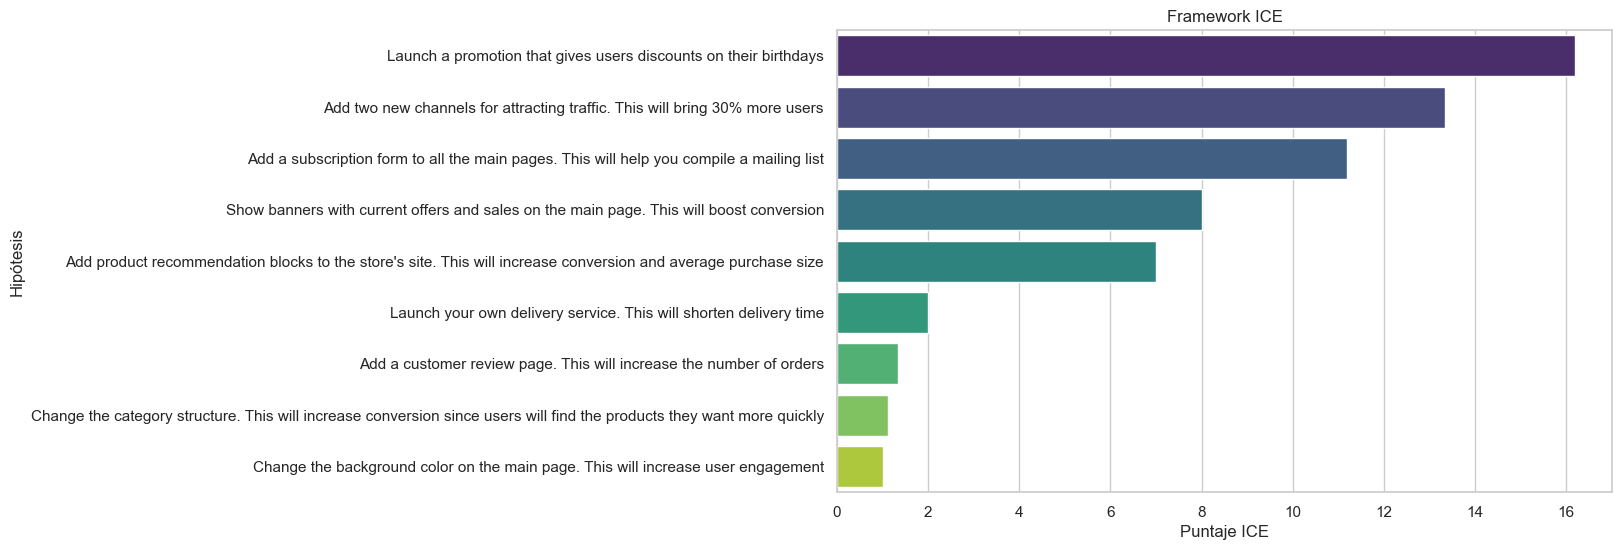

In [19]:
# aplicar el framework ICE para priorizar hipótesis y ordenarlas de forma descendente

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

hypotheses = hypotheses.sort_values(by='ICE', ascending=False)

sns.barplot(x='ICE', y='Hypothesis', data=hypotheses, palette='viridis')

plt.title('Framework ICE')
plt.xlabel('Puntaje ICE')
plt.ylabel('Hipótesis')

plt.show()

<a id="rice-framework"></a>

### RICE Framework

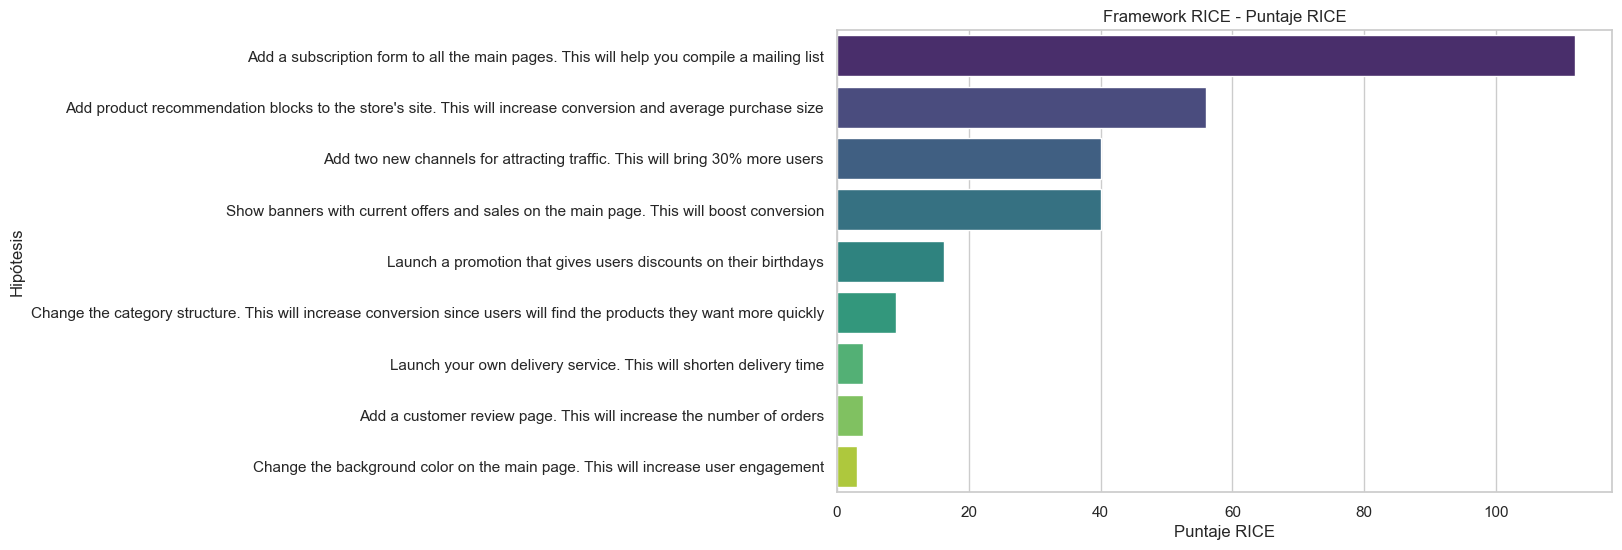

In [20]:
# aplicar el framework RICE para priorizar hipótesis y ordenarlas de forma descendente

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

hypotheses_rice = hypotheses.copy()
hypotheses_rice['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_rice = hypotheses_rice.sort_values(by='RICE', ascending=False)

sns.barplot(x='RICE', y='Hypothesis', data=hypotheses_rice, palette='viridis')

plt.title('Framework RICE - Puntaje RICE')
plt.xlabel('Puntaje RICE')
plt.ylabel('Hipótesis')

plt.show()

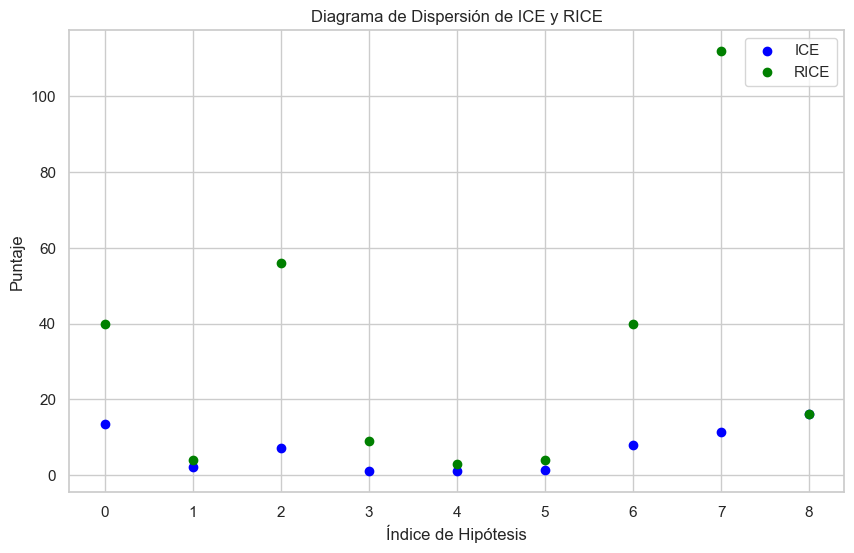

In [21]:
# trazar un diagrama de dispersión para mostrar los puntajes de los dos framework

plt.figure(figsize=(10, 6))

plt.scatter(hypotheses.index, hypotheses['ICE'], color='blue', label='ICE')

plt.scatter(hypotheses.index, hypotheses['RICE'], color='green', label='RICE')

plt.xlabel('Índice de Hipótesis')
plt.ylabel('Puntaje')
plt.title('Diagrama de Dispersión de ICE y RICE')

plt.legend()

plt.show()

<a id="evaluacion"></a>

### Evaluación

__Mayor Énfasis en el Alcance (Reach):__

- __RICE__ da una mayor importancia al alcance que __ICE__
- Esto significa que se valora más la capacidad de una hipótesis para __llegar a un gran número de usuarios__
- En el caso de la __Hipótesis 7__, a pesar de tener un puntaje ICE similar a la __Hipótesis 2__, el alto alcance en RICE la posiciona como __la más prioritaria__

__Ejemplo con la hipótesis 2:__

- Esta hipótesis tiene un __alto puntaje de alcance__ (Reach = 8)
- Lo que la convierte en una de las __principales prioridades__ según RICE
- Aunque tiene un __puntaje ICE menor__ que la Hipótesis 0
- El alcance hace que sea más relevante en términos de __impacto potencial__ en un gran número de usuarios

__Consideraciones estratégicas:__

La priorización basada en __RICE__ puede influir en la selección de las hipótesis a implementar. Al considerar el potencial de __llegar a más usuarios__, la empresa puede optar por priorizar aquellas que tienen un alto alcance incluso si tienen un impacto o confianza ligeramente menor. __RICE__ puede ser especialmente útil en situaciones donde la expansión de la base de usuarios es una prioridad estratégica. Por ejemplo, si el objetivo es adquirir nuevos clientes, las __hipótesis con alto alcance__ pueden ser de mayor interés.

__Equilibrio entre alcance e impacto:__

Es importante destacar que aunque __RICE__ da mayor peso al alcance, no debe subestimarse el impacto. La combinación de alcance e impacto sigue siendo crucial para determinar la __verdadera relevancia__ y __prioridad__ de una hipótesis.

__Adaptabilidad a objetivos empresariales cambiantes:__

La preferencia por __ICE__ o __RICE__ puede variar según los __objetivos específicos__ de la empresa. En ciertos escenarios, puede ser más importante centrarse en el alcance, mientras que en otros casos el impacto inmediato puede ser la principal consideración. __En resumen__, la elección entre ICE y RICE para la priorización de hipótesis depende en gran medida de las __metas y estrategias de la empresa__. RICE brinda una perspectiva valiosa al resaltar el potencial de llegar a un __amplio público__, lo que puede ser fundamental en entornos donde la expansión de la base de usuarios es una __prioridad estratégica__.

__Más detalles:__

La razón por la cual las gráficas tienen __diferentes rangos__ de valores se debe a la forma en que están calculados los puntajes ICE y RICE.

__ICE (Impact, Confidence, Effort):__

Los puntajes de __ICE__ se calculan multiplicando el __Impacto__ (Impact), la __Confianza__ (Confidence) y dividiendo por el __Esfuerzo__ (Effort). Estos valores están en una escala del 1 al 10, por lo tanto, los puntajes de ICE también estarán en ese rango.

__RICE (Reach, Impact, Confidence, Effort):__

En el caso de RICE, se multiplica el __Alcance__ (Reach) con el __Impacto__ (Impact), la __Confianza__ (Confidence) y se divide por el __Esfuerzo__ (Effort). El Alcance (Reach) tiene una escala del 1 al 10, pero puede ser significativamente más alto que las otras puntuaciones. Esto puede llevar a valores de RICE que superen 10, dependiendo del valor de Alcance.

Por lo tanto, en la gráfica de RICE, los valores pueden superar 10 debido al __efecto del Alcance__, mientras que en la gráfica de ICE, los valores estarán limitados al rango de 0 a 10 debido a la naturaleza de las puntuaciones originales (Impacto, Confianza y Esfuerzo).

Ambos métodos proporcionan una __perspectiva valiosa__, y la elección entre ICE y RICE dependerá de las __metas y estrategias específicas del proyecto__.

<a id="analisis-de-test-ab"></a>

## Análisis de Test A/B:

<a id="ingreso-acumulado-por-grupo"></a>

### Ingreso acumulado por grupo

In [22]:
# calcular el ingreso acumulado por grupo

orders_edit.loc[:, 'date'] = pd.to_datetime(orders_edit['date'])
orders_edit = orders_edit.sort_values(by='date')

orders_edit.loc[:, 'cumulative_revenue'] = orders_edit.groupby('group')['revenue'].cumsum()

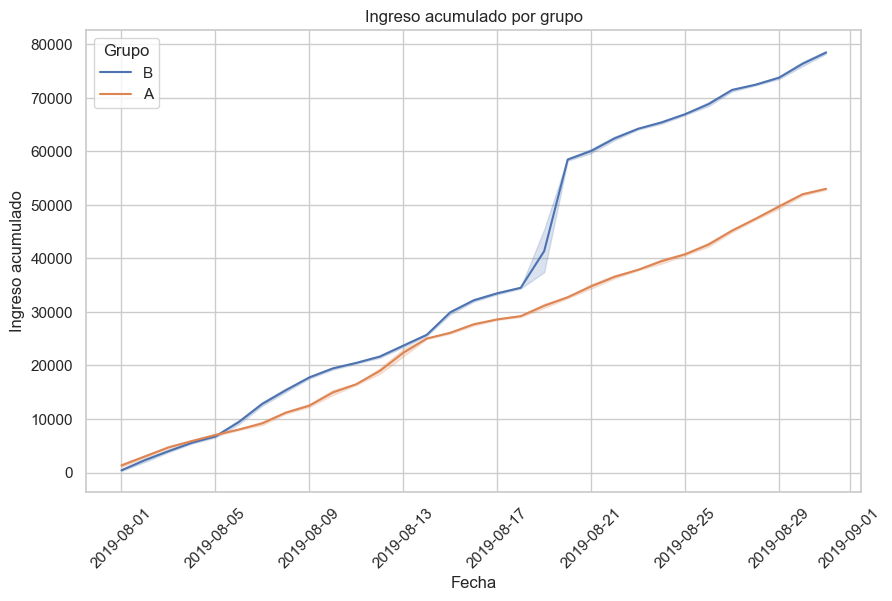

In [23]:
# trazar un gráfico de líneas para mostrar el ingreso acumulado por grupo

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

lineplot = sns.lineplot(x='date', y='cumulative_revenue', hue='group', data=orders_edit)

plt.xticks(rotation=45)

plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.title('Ingreso acumulado por grupo')

plt.legend(title='Grupo')

plt.show()

<a id="tamano-de-pedido-promedio-por-grupo"></a>

### Tamaño de pedido promedio por grupo

In [24]:
# calcular el tamaño de pedido promedio por grupo

orders_edit['avg_order_size'] = orders_edit.groupby('group')['revenue'].cumsum() / (orders_edit.groupby('group').cumcount() + 1)

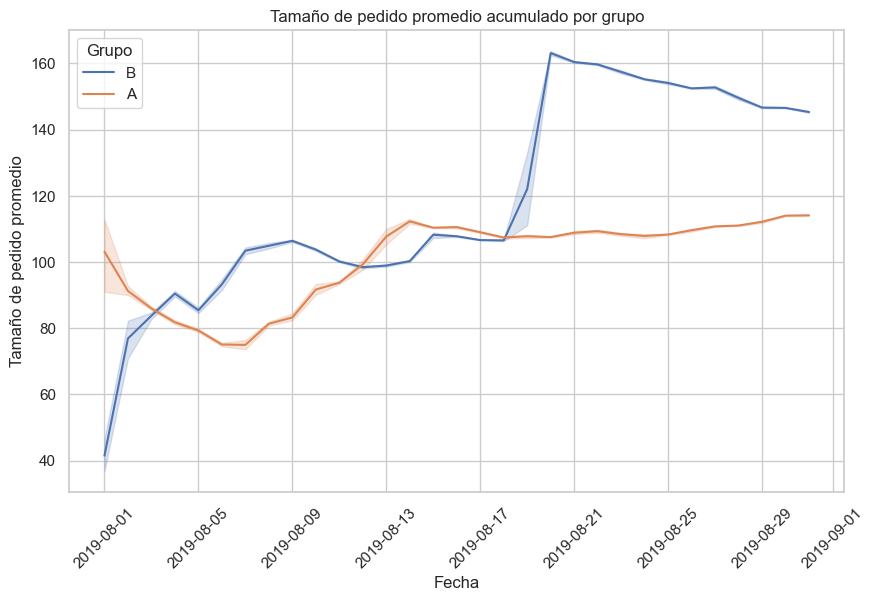

In [25]:
# trazar un gráfico de líneas para mostrar el tamaño de pedido promedio por grupo

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

lineplot = sns.lineplot(x='date', y='avg_order_size', hue='group', data=orders_edit)

plt.xticks(rotation=45)

plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio')
plt.title('Tamaño de pedido promedio acumulado por grupo')

plt.legend(title='Grupo')

plt.show()

<a id="tasa-de-conversion-por-grupo"></a>

### Tasa de conversión por grupo

In [26]:
# calcular la tasa de conversión por grupo

orders_edit['total_orders'] = orders_edit.groupby('group').cumcount() + 1
orders_edit['conversion_rate'] = orders_edit['total_orders'] / orders_edit.groupby('group')['total_orders'].transform('max')

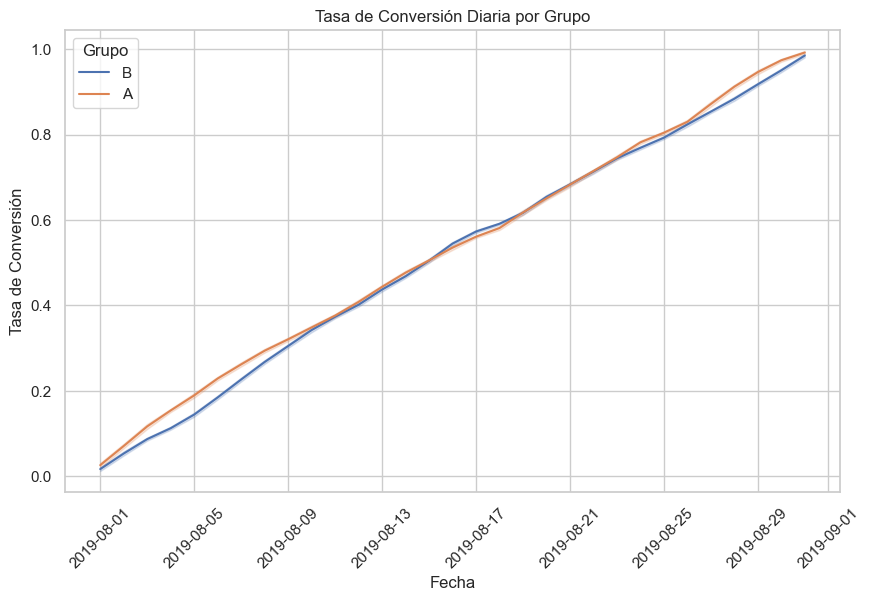

In [27]:
# trazar un gráfico de líneas para mostrar la tasa de conversión diaria por grupo

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

lineplot = sns.lineplot(x='date', y='conversion_rate', hue='group', data=orders_edit)

plt.xticks(rotation=45)

plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.title('Tasa de Conversión Diaria por Grupo')

plt.legend(title='Grupo')

plt.show()

<a id="numero-de-pedidos-por-usuario"></a>

### Número de pedidos por usuario

In [28]:
# calcular el número de pedidos por usuario

total_orders = orders_edit.groupby('visitor_id')['transaction_id'].count().reset_index()
total_orders.columns = ['visitor_id', 'total_orders']

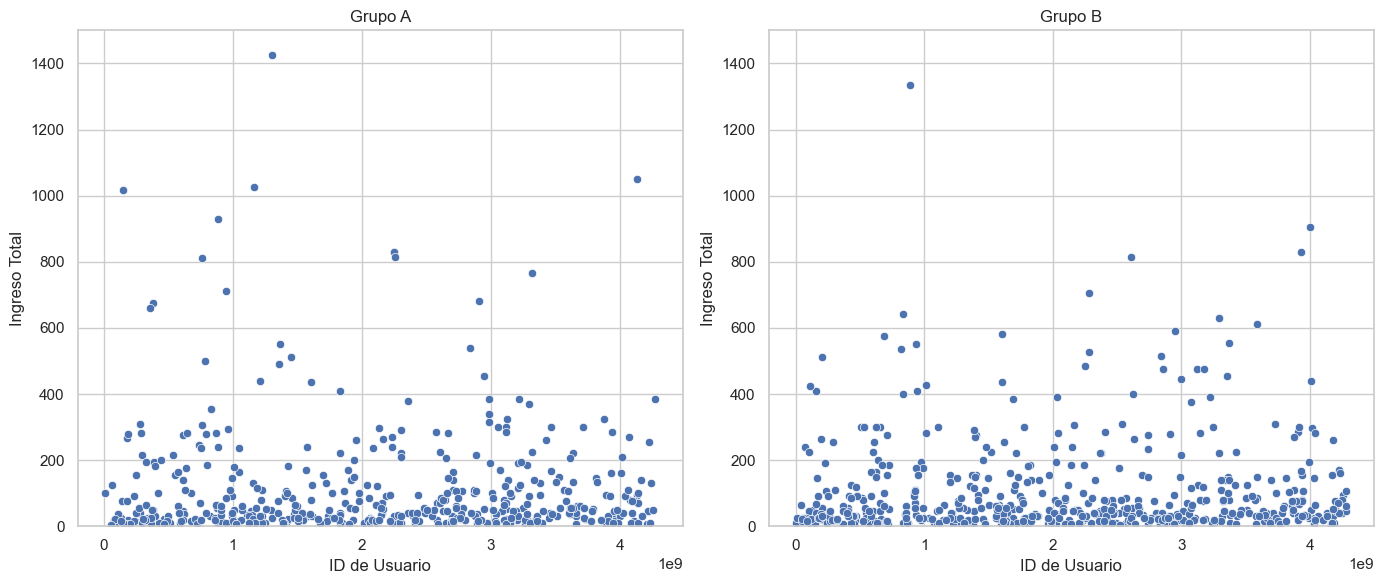

In [29]:
# trazar gráficos de dispersión para mostrar el número de pedidos por usuario por grupo

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  
scatter_A = sns.scatterplot(x='visitor_id', y='revenue', data=group_A)
plt.xlabel('ID de Usuario')
plt.ylabel('Ingreso Total')
plt.title('Grupo A')
plt.ylim(0, 1500)

plt.subplot(1, 2, 2)  
scatter_B = sns.scatterplot(x='visitor_id', y='revenue', data=group_B)
plt.xlabel('ID de Usuario')
plt.ylabel('Ingreso Total')
plt.title('Grupo B')
plt.ylim(0, 1500)

plt.tight_layout()
plt.show()

In [30]:
# definir punto de anomalía por el numero de pedidos

percentile_95 = np.percentile(total_orders['total_orders'], 95)
percentile_99 = np.percentile(total_orders['total_orders'], 99)

punto_anomalia = percentile_99

print(f'Percentil 95: {percentile_95}')
print(f'Percentil 99: {percentile_99}')
print(f'Punto de Anomalía: {punto_anomalia}')

Percentil 95: 1.0
Percentil 99: 2.0
Punto de Anomalía: 2.0


<a id="precios-de-los-pedidos"></a>

### Precios de los pedidos

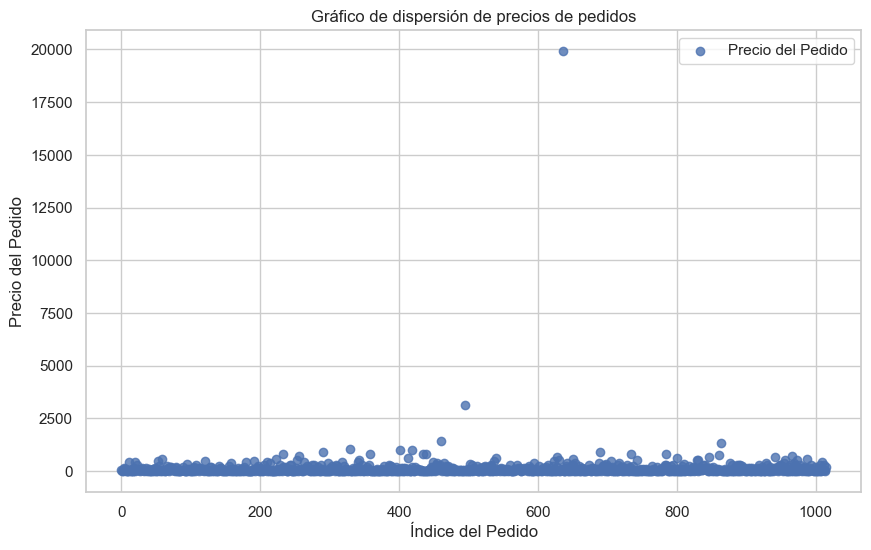

In [31]:
# crear el gráfico de dispersión de precios de pedidos

plt.figure(figsize=(10, 6))
scatter = plt.scatter(range(len(orders_edit['revenue'])), orders_edit['revenue'], alpha=0.8, label='Precio del Pedido')

plt.xlabel('Índice del Pedido')
plt.ylabel('Precio del Pedido')
plt.title('Gráfico de dispersión de precios de pedidos')

plt.legend()

plt.show()

In [32]:
# definir punto de anomalía del precio de los pedidos

percentile_95 = np.percentile(orders_edit['revenue'], 95)
percentile_99 = np.percentile(orders_edit['revenue'], 99)

punto_anomalia = percentile_99

print(f'Percentil 95: {percentile_95}')
print(f'Percentil 99: {percentile_99}')
print(f'Punto de Anomalía: {punto_anomalia}')

Percentil 95: 414.275
Percentil 99: 830.3
Punto de Anomalía: 830.3


<a id="utilizando-datos-brutos"></a>

## Utilizando datos brutos

<a id="diferencia-en-la-conversion-entre-grupos"></a>

### Diferencias en la conversíon entre grupos

In [33]:
# agregar los datos necesario para la prueba de hípotesis

group_A = group_A.copy()
group_B = group_B.copy()

group_A['total_orders'] = group_A.groupby('visitor_id')['transaction_id'].transform('nunique')
group_B['total_orders'] = group_B.groupby('visitor_id')['transaction_id'].transform('nunique')

group_A['conversion_rate'] = group_A['total_orders'] / group_A['total_orders'].max()
group_B['conversion_rate'] = group_B['total_orders'] / group_B['total_orders'].max()

display(group_A.head())
display(group_B.head())

,transaction_id,visitor_id,date,revenue,group,total_orders,conversion_rate
7,2626614568,78758296,2019-08-15,20.1,A,1,0.333333
8,1576988021,295230930,2019-08-15,215.9,A,1,0.333333
10,3649131742,879864040,2019-08-15,65.7,A,1,0.333333
12,2809384911,3213223594,2019-08-15,115.4,A,1,0.333333
14,3859315276,1565034404,2019-08-15,170.9,A,1,0.333333


,transaction_id,visitor_id,date,revenue,group,total_orders,conversion_rate
0,3667963787,3312258926,2019-08-15,30.4,B,1,0.333333
1,2804400009,3642806036,2019-08-15,15.2,B,1,0.333333
3,3797467345,1196621759,2019-08-15,155.1,B,1,0.333333
4,2282983706,2322279887,2019-08-15,40.5,B,1,0.333333
5,182168103,935554773,2019-08-15,35.0,B,1,0.333333


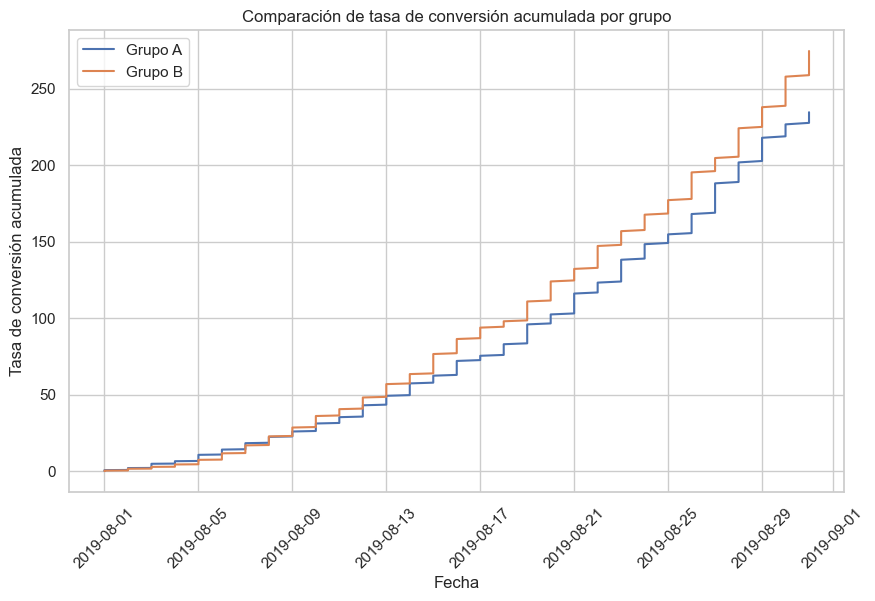

In [34]:
# trazar un gráfico para mostrar las tasas de conversión acumuladas por grupo

plt.figure(figsize=(10, 6))

plt.plot(orders_edit[orders_edit['group']=='A']['date'], 
         orders_edit[orders_edit['group']=='A']['conversion_rate'].cumsum(), 
         label='Grupo A')

plt.plot(orders_edit[orders_edit['group']=='B']['date'], 
         orders_edit[orders_edit['group']=='B']['conversion_rate'].cumsum(), 
         label='Grupo B')

plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión acumulada')
plt.title('Comparación de tasa de conversión acumulada por grupo')

plt.legend()

plt.xticks(rotation=45)

plt.show()

In [35]:
# pruebar la hípotesis

conversion_A = group_A['conversion_rate']
conversion_B = group_B['conversion_rate']

statistic, p_value = mannwhitneyu(conversion_A, conversion_B, alternative='two-sided')

print(f'Estadístico U de Mann-Whitney: {statistic}')
print(f'p-value (filtrado): {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Diferencia significativa: Se rechaza H0')
else:
    print('No hay evidencia de diferencia significativa: No se rechaza H0')

Estadístico U de Mann-Whitney: 130736.0
p-value (filtrado): 0.24726902840458653
No hay evidencia de diferencia significativa: No se rechaza H0


<a id="evaluacion-1"></a>

### Evaluación

Parece que __hay una diferencia significativa__ en las tasas de conversión entre los grupos A y B según la prueba de Mann-Whitney U. Esto significa que __los dos grupos son diferentes__ en términos de tasas de conversión.

- El test de hipótesis que realizamos se basa en el __análisis__ de las tasas de conversión acumuladas __a lo largo del tiempo__. 
- Es posible que las diferencias en las tasas de __conversión diarias__ no sean tan evidentes en un gráfico simple de comparación diaria

- Analizar la acumulación a lo largo del tiempo, identifica patrones que indican si un grupo tiene una tasa de conversión __sistemáticamente mayor__ 
- Este tipo de análisis puede revelar __diferencias significativas__ incluso si las __fluctuaciones diarias__ no son muy evidentes



<a id="diferencia-en-el-tamano-de-pedido-entre-grupos"></a>

### Diferencias en el tamaño promedio de pedido entre grupos

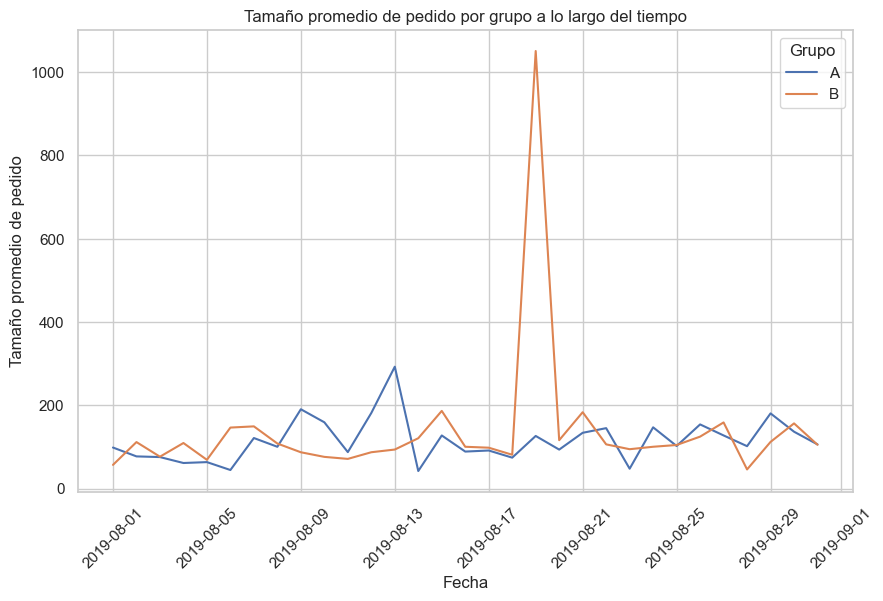

In [36]:
# trazar un gráfico para mostrar el tamaño promedio de pedido a lo largo del tiempo por grupos

avg_order_size = orders_edit.groupby(['date', 'group'])['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(x='date', y='revenue', hue='group', data=avg_order_size)

plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio de pedido')
plt.title('Tamaño promedio de pedido por grupo a lo largo del tiempo')
plt.legend(title='Grupo')

plt.show()

In [37]:
# aplicar la prueba de Mann-Whitney U

size_A = group_A['revenue']
size_B = group_B['revenue']

t_statistic, p_value = stats.ttest_ind(size_A, size_B, equal_var=False)

print(f'T-statistic: {t_statistic}')
print(f'p-value: {p_value}')

alpha = 0.05

if p_value < alpha:
    print('Diferencia significativa: Se rechaza H0')
else:
    print('No hay evidencia de diferencia significativa: No se rechaza H0')

T-statistic: -0.8344812341397616
p-value: 0.4043438730780975
No hay evidencia de diferencia significativa: No se rechaza H0


<a id="evaluacion-2"></a>

### Evaluación

- El resultado indica que __no hay evidencia suficiente__ para rechazar la hipótesis nula
- Esto significa que __no hay una diferencia significativa__ en el tamaño promedio de pedido entre los grupos A y B

<a id="utilizando-datos-filtrados"></a>

## Utilizando datos filtrados

<a id="diferencia-en-la-conversion-entre-grupos-1"></a>

### Diferencias en la conversíon entre grupos

In [38]:
# aplicar la prueba de Mann-Whitney U

statistic, p_value = stats.mannwhitneyu(size_A, size_B, alternative='two-sided')

print(f'Estadístico U de Mann-Whitney: {statistic}')
print(f'p-value (filtrado): {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Diferencia significativa: Se rechaza H0')
else:
    print('No hay evidencia de diferencia significativa: No se rechaza H0')

Estadístico U de Mann-Whitney: 129041.5
p-value (filtrado): 0.8622329690015668
No hay evidencia de diferencia significativa: No se rechaza H0


<a id="evaluacion-3"></a>

### Evaluación

- Los resultados muestran que hay una __diferencia significativa en la tasa de conversión__ entre los grupos A y B
- Incluso cuando se filtran los datos para __excluir anomalías__ 
- Esto sugiere que __la diferencia no está influenciada por puntos de datos atípicos__

<a id="diferencia-en-el-tamano-promedio-de-pedido-entre-grupos"></a>

### Diferencias en el tamaño promedio de pedido entre grupos

In [39]:
# aplicar la prueba de Mann-Whitney U

anomaly_threshold = 830.3

group_A_filtered = group_A[group_A['revenue'] <= anomaly_threshold]
group_B_filtered = group_B[group_B['revenue'] <= anomaly_threshold]

statistic, p_value = stats.mannwhitneyu(group_A_filtered['revenue'], group_B_filtered['revenue'], alternative='two-sided')

print(f'Estadístico U de Mann-Whitney (filtrado): {statistic}')
print(f'p-value (filtrado): {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Diferencia significativa: Se rechaza H0')
else:
    print('No hay evidencia de diferencia significativa: No se rechaza H0')

Estadístico U de Mann-Whitney (filtrado): 126315.5
p-value (filtrado): 0.9343289515500985
No hay evidencia de diferencia significativa: No se rechaza H0


<a id="evaluacion-4"></a>

### Evaluación

- Según la prueba de _Mann-Whitney U_, __no hay evidencia de una diferencia significativa__ en el tamaño promedio de pedido entre los grupos A y B 
- Incluso utilizando los __datos filtrados__
- Esto significa que no podemos __rechazar la hipótesis nula__

<a id="evaluacion-de-estrategias-de-optimizacion-para-incrementar-ingresos"></a>

## Evaluación de Estrategias de Optimización para Incrementar Ingresos

- El objetivo principal es __aumentar los ingresos__, lo cual es una meta clave para el crecimiento y éxito del negocio
- La __disponibilidad de recursos__ (tiempo, presupuesto y personal) no está completamente especificada
- Se recomienda evaluar cuánto se puede asignar a la __implementación de cambios__
- Se han proporcionado varias __opciones de optimización__, cada una acompañada de métricas como Reach, Impact, Confidence y Effort 
- Esto proporciona una __base valiosa__ para evaluar el potencial de cada opción
- Se observa que el __Grupo B__ parece tener un __rendimiento ligeramente superior__ al Grupo A
- Esta observación sugiere que el Grupo B podría ser una __opción preferible__
- Con una muestra de poco más 1000 usuarios, se dispone de una __base sólida__ para tomar decisiones basadas en datos
- No se proporciona información detallada sobre las __condiciones actuales__ 
- Se sugiere realizar una __revisión adicional__ o recopilar más datos si es necesario
- Las opciones "Agregar un formulario de suscripción" y "Agregar bloques de recomendación de productos" se destacan
- Porque tienen __puntajes altos__ en las métricas __ICE__ y __RICE__ estas opciones pueden tener un __impacto positivo__ en los ingresos

En resumen, se recomienda considerar cuidadosamente las __opciones de optimización__, priorizando aquellas con un alto potencial de impacto en los ingresos. Además, se sugiere evaluar los __recursos disponibles__. Para tomar decisiones más informadas, se puede considerar realizar __pruebas piloto__ o __recopilar datos adicionales__. Esto permitirá una evaluación __más precisa__ del impacto de las estrategias seleccionadas.